In [1]:
    # show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### In case that your tqdm is not installed. Please go to the Start(Windows)->Anaconda2(64-bit)->Anaconda Prompt(py35)

### type: conda install tqdm -y

In [2]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import os
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import re
import codecs
from collections import Counter
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
#nltk.download("popular")
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# extract data
!gzip -d -k 20news-19997.tar.gz

!tar -xf 20news-19997.tar

gzip: 20news-19997.tar already exists;	not overwritten


In [4]:
# display newsgroups directories
!ls 20_newsgroups

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


## Support functions

In [5]:
def getFilesDirectory(datapath='20_newsgroups'):
    # create file directory for all files
    files = []
    for (path, dirnames, filenames) in os.walk(datapath):
        files.extend(os.path.join(path, name) for name in filenames)
    # putting file directories into pandas dataframe
    directorydf= pd.DataFrame(files)
    directorydf.columns = ['Directories']
    return directorydf

In [6]:
directorydf = getFilesDirectory()
directorydf.head(n=10)

,Directories
0,20_newsgroups\alt.atheism\49960
1,20_newsgroups\alt.atheism\51060
2,20_newsgroups\alt.atheism\51119
3,20_newsgroups\alt.atheism\51120
4,20_newsgroups\alt.atheism\51121
5,20_newsgroups\alt.atheism\51122
6,20_newsgroups\alt.atheism\51123
7,20_newsgroups\alt.atheism\51124
8,20_newsgroups\alt.atheism\51125
9,20_newsgroups\alt.atheism\51126


In [7]:
# create function to help encoding the targets
#mapping labels to numbers
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

## Q1

### (a)

i. Removed stopwords as when selecting features these words exist will exist in all and would be bad examples of features.  Lowercased the words as well as the meaning between a capitalized word and lowercased word is the same
ii. Ranked features using term frequency. The most common words would generally showcase what the document is about thus if a word contains a of the same words it like belongs to the target
iii. 


### (b)

In [8]:
def dataPreprocessor(k, fs, encode, directorydf, size=None):
    """
    INPUT
        k: int. number of features to use
        fs: string. From ['tf', 'mi']
        encode: string. From ['tf', 'boolean']
        drectorydf: Dataframe. It is given, see above support functions
        size: int. Sample size. Default should be the data size.
    OUTPUT
        data: Dataframe. preprocessed data
    
    ps: 'tf' means term frequency, 'mi' means mutual information
    """
    
    
    ########### your code goes here ###########
# Used code from https://stackoverflow.com/questions/19130512/stopword-removal-with-nltk
    if size == None:
        size = directorydf.size
    counter = Counter()
    stopList = set(stopwords.words('english'))
    #wordList = set (words.words('en'))
    #numbers = list(str(range(0,10)))
    
# Open the files and count the word frequency in each file in a loop and update the counter after finished processing a file

    for rownum, row in enumerate(directorydf.itertuples()):
        if rownum == (size+1):
            break;
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            counter.update([word.lower() for word in re.findall(r'\w+', myfile.read()) if word.lower() not in stopList and word.lower().isalpha()])
  
   # with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
    #    data2=myfile.readlines()    
        
        #k is sent by user aka feature selection number
        
        topk = counter.most_common(k)
        #print(topk)
    
    
    
    np = []
    # now we had top k words, count the frequecy (binary) of these words in individual file
    for rownum, row in enumerate(directorydf.itertuples()):
        if rownum == (size+1):
            break;
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            tempCounter = Counter([word.lower() for word in re.findall(r'\w+', myfile.read()) if word.lower() not in stopList and word.lower().isalpha()])
             
            
        
            # if the word appears in the doc, then 1, else 
            if encode == 'tf':
                topkinDoc = [tempCounter[word] if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
            else:
                topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
            # create a list for top k words with encoded target and its label
            
            np.append(topkinDoc+[label_target(row.Directories)]+[row.Directories])
            if (rownum % 1000 == 0):
                print("processed %d files" % (rownum+1))
    
    
    data = pd.DataFrame(np)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    data.columns = dfName+['target','label']
    
    ###########         end         ###########
    return data

In [9]:
import time

start = time.time()
data = dataPreprocessor(k=100, fs='tf', encode='tf', directorydf=directorydf,size=5000)
end = time.time()
print(end - start)

processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
41.465651512145996


In [10]:
data.head(n=10)

,ax,edu,cmu,cs,com,comp,news,srv,net,cantaloupe,...,image,europa,sei,gtefsd,ece,uunet,problem,computer,target,label
0,0,10,5,3,1,0,4,3,2,2,...,0,0,1,0,0,1,0,0,0,20_newsgroups\alt.atheism\49960
1,0,5,4,3,1,0,3,3,1,2,...,0,1,0,1,1,0,2,0,0,20_newsgroups\alt.atheism\51060
2,0,7,3,4,3,0,2,2,1,1,...,0,1,0,1,1,0,1,0,0,20_newsgroups\alt.atheism\51119
3,0,6,4,3,1,0,1,3,1,2,...,0,1,0,1,1,1,0,0,0,20_newsgroups\alt.atheism\51120
4,0,4,4,3,10,0,0,3,1,2,...,0,1,0,1,1,1,0,0,0,20_newsgroups\alt.atheism\51121
5,0,5,3,3,7,0,1,2,1,1,...,0,1,0,1,1,0,0,0,0,20_newsgroups\alt.atheism\51122
6,0,13,3,5,2,0,0,2,2,1,...,0,1,0,1,1,1,0,0,0,20_newsgroups\alt.atheism\51123
7,0,8,3,3,1,0,1,2,1,1,...,0,1,0,1,1,0,0,0,0,20_newsgroups\alt.atheism\51124
8,0,9,3,2,4,0,0,2,1,1,...,0,1,0,1,1,0,0,0,0,20_newsgroups\alt.atheism\51125
9,0,14,3,2,3,0,1,2,2,1,...,0,1,0,1,1,1,0,0,0,20_newsgroups\alt.atheism\51126


### (c)

In [11]:
#Confidence Interval Function
import scipy.stats
from math import sqrt
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = stats.t.ppf(confidence, n)
    h=z*sd/sqrt(n)
    return mu, h

In [12]:
    def randomSplitCI(data, clf, num_run, **params):

        """
        INPUT
            data: 2D numpy array. Pre-processed data
            clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
            num_run: int. How many times you want to run for random evaluation?
            params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01

        OUTPUT
            train_scores: list. Results of trails
            test_scores: list. Results of trails
            train_mean: scalar. Average accuracy
            test_mean: scalar. Average accuracy
            train_ci: scalar. Confidence Interval
            test_ci: scalar. Confidence Interval
        """
    
    
        ########### your code goes here ###########
        #for hp in params:
        
            #print(hp_value)
        num = 0
        train_scores = []
        test_scores = []
        if clf == 'LR':
            hp = params['c']
            clfType = LogisticRegression(C=hp)
        else:
            clfType = GaussianNB()

        column_df = data.columns[:-2]
        column_df = list(column_df)
        
        featureLabels=[]
        for word in column_df:
            featureLabels.append(word)

        features_df = data[featureLabels]
        features = features_df.as_matrix()

        target_df= data['target']
        target = target_df.as_matrix()

        labels = data['label'].unique()
        while num < num_run:
            feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)
            #, stratify = target
            #print(feature_train)
            print("Round: " , num)
            
            clfModel = clfType.fit(feature_train, target_train, None)
            target_pred_train = clfModel.predict(feature_train)
            target_pred_test = clfModel.predict(feature_test)

            train_scores.append(metrics.accuracy_score(target_train,target_pred_train))
            test_scores.append(metrics.accuracy_score(target_test,target_pred_test))
           
            num = num + 1



        train_mean, train_ci = mean_confidence_interval(train_scores)
        test_mean, test_ci = mean_confidence_interval(test_scores)



        ###########         end         ###########
        return train_scores,test_scores,train_mean,test_mean,train_ci,test_ci
    

In [13]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'NB', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Round:  0
Round:  1
Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8
Round:  9
Train    
Result of trails:[0.59799999999999998, 0.56428571428571428, 0.54314285714285715, 0.57171428571428573, 0.54571428571428571, 0.58085714285714285, 0.54514285714285715, 0.5714285714285714, 0.54314285714285715, 0.60171428571428576]     
Average Accuracy: 0.5665142857142857     
Confidence Interval: 0.01212330546107579

Test    
Result of trails:[0.61692205196535643, 0.5376415722851432, 0.54097268487674888, 0.57361758827448373, 0.53297801465689543, 0.58960692871419051, 0.51965356429047305, 0.54763491005996001, 0.53097934710193206, 0.60626249167221857]     
Average Accuracy: 0.5596269153897402     
Confidence Interval: 0.018709664451538374


### (d)

### (e)

In [14]:
def randomSplitCM(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        cm: pandas.DataFrame. Confusion Matrix
    """
    
    
    ########### your code goes here ###########
    num = 0
    cms = {}
    if clf == 'LR':
        clfType = LogisticRegression(C=params['c'])
    else:
        clfType = GaussianNB()

    column_df = data.columns[:-2]
    column_df = list(column_df)
        
    featureLabels=[]
    for word in column_df:
        featureLabels.append(word)

    features_df = data[featureLabels]
    features = features_df.as_matrix()

    target_df= data['target']
    target = target_df.as_matrix()

    labels = data['label'].unique()


    while num < num_run:
        
        feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)
        #, stratify = target
        #print(feature_train)
        print("Round: " , num)

        clfModel = clfType.fit(feature_train, target_train, None)
        #target_pred_train = clfModel.predict(feature_train)
        target_pred_test = clfModel.predict(feature_test)
        
        cms[num] = pd.DataFrame(metrics.confusion_matrix(target_test, target_pred_test))
        num = num + 1

    pl = pd.Panel(cms)
    cm = pl.sum(axis=0)
    
    
    ###########         end         ###########
    return cm

In [15]:
cm = randomSplitCM(data, 'LR', 10, c=1.0)

Round:  0
Round:  1
Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8
Round:  9


C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  if __name__ == '__main__':


### (f)

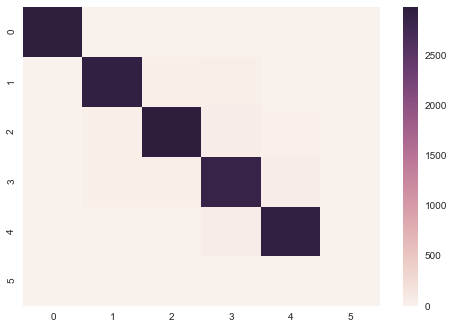

In [16]:
sns.heatmap(cm)

## Q2

### (a)

In [17]:
def featureSizeAC(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_mean_fs: list.
        train_ci_fs: list.
        test_mean_fs: list.
        test_ci_fs: list.
        
    """
    feature_percentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    ########### your code goes here ###########
    
    train_mean_fs = []
    train_ci_fs = []
    test_mean_fs = []
    test_ci_fs = []
    
    count=0
    for num_feature in feature_percentage:
        print("Round: " , count)
        count = count + 1
        
        num = 0
        
        
        
        train_scores = []
        test_scores = []
        if clf == 'LR':
            hp = params['c']
            clfType = LogisticRegression(C=hp)
        else:
            clfType = GaussianNB()

        column_df = data.columns[:-2]
        column_df = list(column_df)
        
        np.random.shuffle(column_df)
        
        feature_stop = int(num_feature*len(column_df))
        column_df = column_df[:feature_stop]
        print(column_df)
        
        featureLabels=[]
        for word in column_df:
            featureLabels.append(word)

        features_df = data[featureLabels]
        features = features_df.as_matrix()

        target_df= data['target']
        target = target_df.as_matrix()

        labels = data['label'].unique()
        while num < num_run:
            feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)
            #, stratify = target
            #print(feature_train)
            #print("Round: " , num)
            
            clfModel = clfType.fit(feature_train, target_train, None)
            target_pred_train = clfModel.predict(feature_train)
            target_pred_test = clfModel.predict(feature_test)

            train_scores.append(metrics.accuracy_score(target_train,target_pred_train))
            test_scores.append(metrics.accuracy_score(target_test,target_pred_test))
           
            num = num + 1



        train_mean, train_ci = mean_confidence_interval(train_scores)
        test_mean, test_ci = mean_confidence_interval(test_scores)
        
        train_mean_fs.append(train_mean)
        train_ci_fs.append(train_ci)
        test_mean_fs.append(test_mean)
        test_ci_fs.append(test_ci)

        
        
        

    
    
    
    ###########         end         ###########
    return train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs

In [18]:
train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs = featureSizeAC(data, 'LR', 10, c=1.0)

Round:  0
['may', 'pc', 'windows', 'state', 'comp', 'srv', 'news', 'c', 'near', 'uunet']
Round:  1
['h', 'references', 'crabapple', 'would', 'cmu', 'news', 'k', 'atheism', 'reston', 'know', 'howland', 'drive', 'near', 'os', 'image', 'u', 'gmt', 'cc', 'cs', 'posting']
Round:  2
['k', 'posting', 'ca', 'ac', 'university', 'u', 'like', 'l', 'also', 'reston', 'date', 'harvard', 'nntp', 'apr', 'people', 'das', 'ax', 'z', 'near', 'writes', 'windows', 'cs', 'n', 'pc', 'eng', 'ibm', 'cc', 'gmt', 'howland', 'sys']
Round:  3
['usenet', 'sys', 'srv', 'newsgroups', 'net', 'image', 'ans', 'b', 'think', 'host', 'problem', 'apr', 'g', 'h', 'com', 'university', 'europa', 'ms', 'comp', 'state', 'misc', 'ac', 'like', 'sei', 'date', 'mps', 'atheism', 'ca', 'would', 'cantaloupe', 'one', 'system', 'de', 'posting', 'subject', 'max', 'gtefsd', 'writes', 'howland', 'alt']
Round:  4
['cantaloupe', 'europa', 'use', 'subject', 'x', 'organization', 'system', 'file', 'problem', 'ibm', 'edu', 'b', 'misc', 'id', 'peo

### (b)

In [19]:
def featureSizePlot(feature_size, train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(feature_size, test_mean_fs, color=sns.xkcd_rgb["pale red"], yerr=test_ci_fs)
    train_curve=plt.errorbar(feature_size, train_mean_fs,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_fs)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Feature Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Feature Size")
    plt.show()

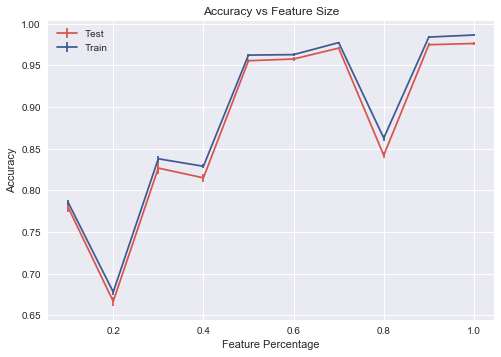

In [20]:
featureSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs )

## Q3

In [21]:
def hyperParameterAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
    
    OUTPUT
        test_mean_hp: list.  mean accuracy list of test
        test_ci_hp: list. confidence interval list of test
        train_mean_hp: list. mean accuracy list of train
        train_ci_hp: list. confidence interval list of train
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    params = np.logspace(-4, 4, num=9)


    ########### your code goes here ###########
    
    train_mean_hp = []
    train_ci_hp = []
    test_mean_hp = []
    test_ci_hp = []
    
    count=0
    for c in params:
        print("Round: " , count)
        count = count + 1
        
        num = 0
        
        
        
        train_scores = []
        test_scores = []
        if clf == 'LR':
            clfType = LogisticRegression(C=c)
        else:
            clfType = GaussianNB()

        column_df = data.columns[:-2]
        column_df = list(column_df)
        
        np.random.shuffle(column_df)
        
        #feature_stop = int(num_feature*len(column_df))
        #column_df = column_df[:feature_stop]
        #print(column_df)
        
        featureLabels=[]
        for word in column_df:
            featureLabels.append(word)

        features_df = data[featureLabels]
        features = features_df.as_matrix()

        target_df= data['target']
        target = target_df.as_matrix()

        labels = data['label'].unique()
        while num < num_run:
            feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)
            #, stratify = target
            #print(feature_train)
            #print("Round: " , num)
            
            clfModel = clfType.fit(feature_train, target_train, None)
            target_pred_train = clfModel.predict(feature_train)
            target_pred_test = clfModel.predict(feature_test)

            train_scores.append(metrics.accuracy_score(target_train,target_pred_train))
            test_scores.append(metrics.accuracy_score(target_test,target_pred_test))
           
            num = num + 1



        train_mean, train_ci = mean_confidence_interval(train_scores)
        test_mean, test_ci = mean_confidence_interval(test_scores)
        
        train_mean_hp.append(train_mean)
        train_ci_hp.append(train_ci)
        test_mean_hp.append(test_mean)
        test_ci_hp.append(test_ci)
  
    
    
    
    ###########         end         ###########
    return train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp

In [22]:
train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp = hyperParameterAC(data, 'LR', 3)

Round:  0
Round:  1
Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8


In [23]:
def hyperParameterPlot(params, train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(params, test_mean_hp, color=sns.xkcd_rgb["pale red"], yerr=test_ci_hp)
    train_curve=plt.errorbar(params, train_mean_hp,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_hp)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Parameter')
    plt.xscale("log")
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Parameters")
    plt.show()

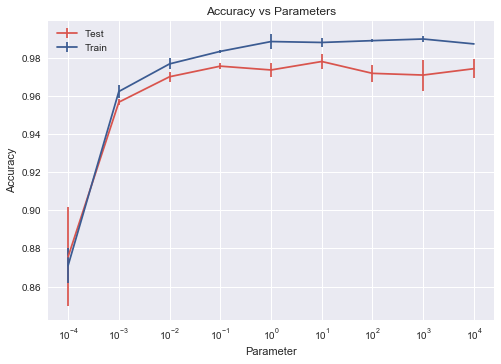

In [24]:
hyperParameterPlot(np.logspace(-4, 4, num=9),train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp )

## Q4

### (a)

In [25]:
def dataSizeAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        test_mean_ds: list.  mean accuracy list of test
        test_ci_ds: list. confidence interval list of test
        train_mean_ds: list. mean accuracy list of train
        train_ci_ds: list. confidence interval list of train
        
        
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    data_percentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    ########### your code goes here ###########
    train_mean_ds = []
    train_ci_ds = []
    test_mean_ds = []
    test_ci_ds = []
    
    count=0
    for dp in data_percentage:
        print("Round: " , count)
        count = count + 1

        num = 0

        train_scores = []
        test_scores = []
        if clf == 'LR':
            clfType = LogisticRegression(C=0.1)
        else:
            clfType = GaussianNB()

        column_df = data.columns[:-2]
        column_df = list(column_df)

        np.random.shuffle(column_df)

        #feature_stop = int(num_feature*len(column_df))
        #column_df = column_df[:feature_stop]
        #print(column_df)

        featureLabels=[]
        for word in column_df:
            featureLabels.append(word)

        features_df = data[featureLabels]
        features = features_df.as_matrix()

        target_df= data['target']
        target = target_df.as_matrix()

        labels = data['label'].unique()
        while num < num_run:
            feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)
            
            
            dpStopFeature = int(dp*len(feature_train))
            feature_train_cut = feature_train[:dpStopFeature]
            dpStopTarget = int(dp*len(target_train))
            target_train_cut = target_train[:dpStopTarget]
            
            

            clfModel = clfType.fit(feature_train_cut, target_train_cut, None)
            target_pred_train = clfModel.predict(feature_train_cut)
            target_pred_test = clfModel.predict(feature_test)

            train_scores.append(metrics.accuracy_score(target_train_cut,target_pred_train))
            test_scores.append(metrics.accuracy_score(target_test,target_pred_test))

            num = num + 1

            
        train_mean, train_ci = mean_confidence_interval(train_scores)
        test_mean, test_ci = mean_confidence_interval(test_scores)

        train_mean_ds.append(train_mean)
        train_ci_ds.append(train_ci)
        test_mean_ds.append(test_mean)
        test_ci_ds.append(test_ci)

    

    
    
    
    
    ###########         end         ###########
    return train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds

In [26]:
train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds = dataSizeAC(data, 'LR', 3)

Round:  0
Round:  1
Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8
Round:  9


### (b)

In [27]:
def dataSizePlot(datasize, train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(datasize, test_mean_ds, color=sns.xkcd_rgb["pale red"], yerr=test_ci_ds)
    train_curve=plt.errorbar(datasize, train_mean_ds,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_ds)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Data Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Data Percentage")
    plt.show()

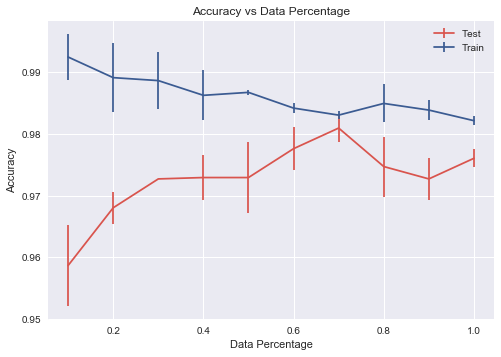

In [28]:
dataSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds)

## Q5

### (a)

### (b)

You should be able to get this answer easily by running dataPreprocessor fuction and randomSplitCI function

## Q6

### (a)